In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob
import tensorflow as tf

In [2]:
train_path = '../input/plantseedlings/plant-seedlings-final/train/'
test_path = '../input/plantseedlings/plant-seedlings-final/test/'

In [3]:
img = load_img(train_path + "Charlock/022179d65.png", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()


In [4]:
#images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Blueberry','Lemon', 'Kiwi']


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# fig = plt.figure(figsize =(15,5))
# for i in range(9):
#     ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
#     #fig.patch.set_facecolor('#E53090')
#     #Above code adds a background color for subplots you can change the hex color code as you wish
#     plt.title(images[i])
#     plt.axis("off")
#     ax.imshow(load_img(train_path + images[i] +"/0_100.jpg", target_size=(100,100)))

In [6]:
x = img_to_array(img)
print(x.shape)

In [7]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

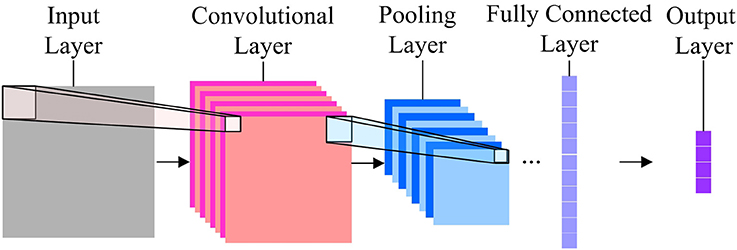

# Cnn Model

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape= x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))#output
model.add(Activation("softmax"))


In [9]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [10]:
model.summary()

In [11]:
batch_size = 32

# Data Augmentation

* rescale ----> rescaling factor. Defaults to None.
* shear_range ----> 'Shear' means that the image will be distorted along an axis, mostly to create or rectify the perception angles.
* horizontal_flip ----> Boolean. Randomly flip inputs horizontally.
* vertical_flip ----> Boolean. Randomly flip inputs vertically.
* zoom_range ----> Float or [lower, upper]. Range for random zoom

OTHER FUNCTIONS OF ImageDataGenerator

* featurewise_center: Boolean. Set input mean to 0 over the dataset, feature-wise.
* samplewise_center: Boolean. Set each sample mean to 0.
* featurewise_std_normalization: Boolean. Divide inputs by std of the dataset, feature-wise.
* samplewise_std_normalization: Boolean. Divide each input by its std.
* zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
* zca_whitening: Boolean. Apply ZCA whitening.
* rotation_range: Int. Degree range for random rotations.
width_shift_range: 
height_shift_range: 
* brightness_range: Tuple or list of two floats. Range for picking a brightness shift value from.
* channel_shift_range: Float. Range for random channel shifts.
* fill_mode: One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'.
* cval: Float or Int. Value used for points outside the boundaries when fill_mode = "constant".
* validation_split: Float. Fraction of images reserved for validation (strictly between 0 and 1).
* dtype: Dtype to use for the generated arrays.
* preprocessing_function: function that will be applied on each input. 
* data_format: Image data format, either "channels_first" or "channels_last".


Source: https://keras.io/api/preprocessing/image/

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

In [18]:
# checkpoint_path = "../training_1/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1,save_freq=5*batch_size)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    hist = model.fit_generator(generator = train_generator, 
                       steps_per_epoch = 1600 // batch_size,
                       epochs = 50,
                       validation_data = test_generator,
                       validation_steps = 800 // batch_size
                               #,callbacks=[cp_callback]
                              ,verbose=1)

In [19]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('../saved_model/')

In [20]:
print(hist.history.keys())

# Train-Validation Loss

In [21]:
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

# Train-Validation Accuracy

In [22]:
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

In [27]:
val_generator = test_datagen.flow_from_directory('../input/plantseedlings/plant-seedlings-final/val',
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

In [43]:
def plat_label(result):
    if result[0][0] == 1:
        prediction = 'Black-grass'
    if result[0][1] == 1:
        prediction = 'Charlock'
    if result[0][2] == 1:
        prediction = 'Cleavers'
    elif result[0][3] == 1:
        prediction = 'Common Chickweed'
    elif result[0][4] == 1:
        prediction = 'Common wheat'
    elif result[0][5] == 1:
        prediction = 'Fat Hen'
    elif result[0][6] == 1:
        prediction = 'Loose Silky-bent'
    elif result[0][6] == 1:
        prediction = 'Maize'
    elif result[0][6] == 1:
        prediction = 'Scentless Mayweed'
    elif result[0][6] == 1:
        prediction = 'Shepherds Purse'
    elif result[0][6] == 1:
        prediction = 'Small-flowered Cranesbill'
    elif result[0][6] == 1:
        prediction = 'Sugar beet'

    print('predicted plat seed is ' , prediction)

In [36]:
print(val_generator.class_indices)

In [46]:
def plat_predict(path):
    test_image = load_img(
        path,
        target_size=(100, 100))
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)

    print(result)
    plat_label(result)

In [47]:
plat_predict('../input/plantseedlings/plant-seedlings-final/val/Fat Hen/0dfbbc7fe.png')

In [48]:
plat_predict('../input/plantseedlings/plant-seedlings-final/val/Charlock/13d67633c.png')